In [249]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px

In [250]:
biometrics_df = df = pd.read_csv('biometrics_data.csv', delimiter=';')
biometrics_df.head()

,walking_type,video_id,person_id,camera_type,steps_length,avg_step_length,speed,time,distance,asymmetry
0,normal,athletic_male,1,front,[0.206535 0.16247936 0.15428336 0.16719694 0...,0.157053,0.336541,84,0.942315,3.557927
1,abnormal,limping_4,1,front,[0.32993475 0.25341373 0.25160984 0.25408458 0...,0.260952,0.387126,182,2.348565,18.524260
2,abnormal,limping_4,2,front,[0.21386674 0.21163296 0.20930154 0.2111826 0...,0.185687,0.361059,216,2.599625,15.970930
3,abnormal,cane1,1,front,[0.21219474 0.12049623 0.11709654 0.19381784 0...,0.172323,0.258485,240,2.067881,21.721027
4,abnormal,cane1,2,front,[0.15121503 0.15126347 0.15025296 0.15138295 0...,0.177433,0.342039,249,2.838926,39.067362


In [251]:
# Somehow the steps_length column is a string of a list of floats, so we need to convert it to a list of floats
biometrics_df["steps_length"] = biometrics_df["steps_length"].apply(
    lambda x: np.fromstring(x[1:-1], sep=" ")
)

# Rename side by side video
biometrics_df.loc[(biometrics_df['video_id'] == 'drunk_woman') & (biometrics_df['person_id'] == 0), 'camera_type'] = 'side'
biometrics_df.loc[(biometrics_df['video_id'] == 'drunk_woman') & (biometrics_df['person_id'] == 1), 'camera_type'] = 'front'

# Remove outlier
biometrics_df = biometrics_df[ (biometrics_df['video_id'] != 'DTU1') & (biometrics_df['asymmetry'] > -10.0)]

# Rename labels
replace = {"side2": "side", "front_multiple": "front", "back": "front", 'frontback': 'front'}
biometrics_df["camera_type"].replace(replace, inplace=True)

/var/folders/9m/g275tx_539v54jng1dk7_3m00000gn/T/ipykernel_31106/2498395683.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biometrics_df["camera_type"].replace(replace, inplace=True)


In [252]:
biometrics_df["walking_type"].unique()
biometrics_df["camera_type"].unique()

array(['front', 'side', 'side_front'], dtype=object)

In [253]:
"""
INPUT:
- condition: a text filter (e.g. "side", "front", "normal", "abnormal")
"""
condition = "normal"

In [254]:
clustering_df = biometrics_df.copy()
clustering_df["class"] = clustering_df["walking_type"] + "_" + clustering_df["camera_type"]
clustering_df["class"] = clustering_df["walking_type"]

# clustering_df = clustering_df[(clustering_df["camera_type"] == "front") | (clustering_df["camera_type"] == "side")]
# clustering_df = clustering_df[(clustering_df["camera_type"] == "front")]
# clustering_df = clustering_df[(clustering_df["camera_type"] == "side")]

# clustering_df = clustering_df[clustering_df["camera_type"] == (condition)]
# clustering_df = clustering_df[clustering_df["walking_type"] == (condition)]

lustering_df = clustering_df[["class", "avg_step_length", "speed", "asymmetry"]]
clustering_df.head()


,walking_type,video_id,person_id,camera_type,steps_length,avg_step_length,speed,time,distance,asymmetry,class
0,normal,athletic_male,1,front,"[0.206535, 0.16247936, 0.15428336, 0.16719694,...",0.157053,0.336541,84,0.942315,3.557927,normal
1,abnormal,limping_4,1,front,"[0.32993475, 0.25341373, 0.25160984, 0.2540845...",0.260952,0.387126,182,2.348565,18.524260,abnormal
2,abnormal,limping_4,2,front,"[0.21386674, 0.21163296, 0.20930154, 0.2111826...",0.185687,0.361059,216,2.599625,15.970930,abnormal
3,abnormal,cane1,1,front,"[0.21219474, 0.12049623, 0.11709654, 0.1938178...",0.172323,0.258485,240,2.067881,21.721027,abnormal
4,abnormal,cane1,2,front,"[0.15121503, 0.15126347, 0.15025296, 0.1513829...",0.177433,0.342039,249,2.838926,39.067362,abnormal


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import accuracy_score

In [256]:
X_base = clustering_df[["avg_step_length", "speed", "asymmetry"]]
y_base = clustering_df[["class"]]

# X = X_base[y_base["class"].str.contains(condition)]
# y = y_base[y_base["class"].str.contains(condition)]

X = X_base
y = y_base

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [257]:
clf = svm.SVC(kernel="linear").fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

# clf = KMeans(n_clusters=4)
# clf.fit(X_train, y_train)
# y_pred_test = kmeans.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7142857142857143

# GMM

In [258]:
from sklearn.model_selection import cross_val_score, StratifiedKFold  # Import StratifiedKFold
from sklearn.mixture import GaussianMixture  # Import GaussianMixture
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

# Set up the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)  # You can adjust the number of components

# Set up the k-fold cross-validation
k_fold = 5  # You can choose the number of folds as per your requirement
combinations = [("avg_step_length", "speed"), ("avg_step_length", "asymmetry"), ("speed", "asymmetry")]

print("ALL")
# Perform k-fold cross-validation and get accuracy scores
# Use 'scoring' parameter to specify the scoring metric (default is accuracy)
scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=k_fold, random_state=42, shuffle=True).split(X, y["class"]):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit the GMM on the training data
    gmm.fit(X_train)
    
    # Predict cluster assignments for the test data
    cluster_assignments = gmm.predict(X_test)
    
    # Map cluster assignments to class labels
    unique_clusters = np.unique(cluster_assignments)
    cluster_label_mapping = {}
    for cluster in unique_clusters:
        cluster_samples = y_test["class"][cluster_assignments == cluster]
        most_frequent_label = cluster_samples.value_counts().idxmax()
        cluster_label_mapping[cluster] = most_frequent_label
    predicted_labels = [cluster_label_mapping[cluster] for cluster in cluster_assignments]
    
    # Evaluate accuracy based on class labels
    accuracy = accuracy_score(y_test["class"], predicted_labels)
    scores.append(accuracy)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)
# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy:", np.mean(scores))
print("Standard deviation of accuracy:", np.std(scores))
print()

for i, (x_axis, y_axis) in enumerate(combinations):
    print((x_axis, y_axis))
    # Perform k-fold cross-validation and get accuracy scores
    # Use 'scoring' parameter to specify the scoring metric (default is accuracy)
    scores = []
    for train_idx, test_idx in StratifiedKFold(n_splits=k_fold, random_state=42, shuffle=True).split(X[[x_axis, y_axis]], y["class"]):
        X_train, X_test = X[[x_axis, y_axis]].iloc[train_idx], X[[x_axis, y_axis]].iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Fit the GMM on the training data
        gmm.fit(X_train)
        
        # Predict cluster assignments for the test data
        cluster_assignments = gmm.predict(X_test)
        
        # Map cluster assignments to class labels
        unique_clusters = np.unique(cluster_assignments)
        cluster_label_mapping = {}
        for cluster in unique_clusters:
            cluster_samples = y_test["class"][cluster_assignments == cluster]
            most_frequent_label = cluster_samples.value_counts().idxmax()
            cluster_label_mapping[cluster] = most_frequent_label
        predicted_labels = [cluster_label_mapping[cluster] for cluster in cluster_assignments]
        
        # Evaluate accuracy based on class labels
        accuracy = accuracy_score(y_test["class"], predicted_labels)
        scores.append(accuracy)

    # Print the accuracy scores for each fold
    print("Accuracy scores for each fold:", scores)
    # Print the mean and standard deviation of the accuracy scores
    print("Mean accuracy:", np.mean(scores))
    print("Standard deviation of accuracy:", np.std(scores))
    print()


ALL
Accuracy scores for each fold: [0.75, 0.875, 0.75, 0.875, 0.625]
Mean accuracy: 0.775
Standard deviation of accuracy: 0.09354143466934853

('avg_step_length', 'speed')
Accuracy scores for each fold: [0.625, 0.625, 0.75, 0.625, 0.875]
Mean accuracy: 0.7
Standard deviation of accuracy: 0.1

('avg_step_length', 'asymmetry')
Accuracy scores for each fold: [0.875, 0.875, 0.75, 0.875, 0.75]
Mean accuracy: 0.825
Standard deviation of accuracy: 0.06123724356957945

('speed', 'asymmetry')
Accuracy scores for each fold: [0.875, 0.875, 0.75, 0.875, 0.75]
Mean accuracy: 0.825
Standard deviation of accuracy: 0.06123724356957945



In [259]:
# fig = px.scatter_3d(biometrics_df, x='avg_step_length', y='speed', z='asymmetry', color='camera_type', symbol='walking_type', width=1000, height=1000)
# fig.show()

['normal', 'abnormal']
normal
abnormal


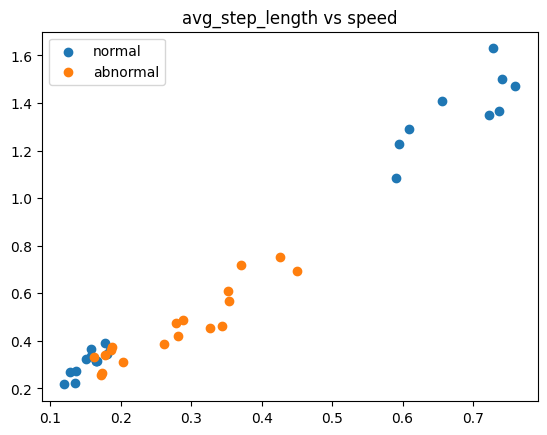

normal
abnormal


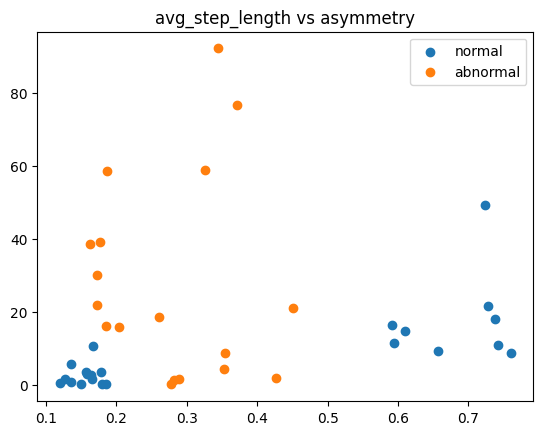

normal
abnormal


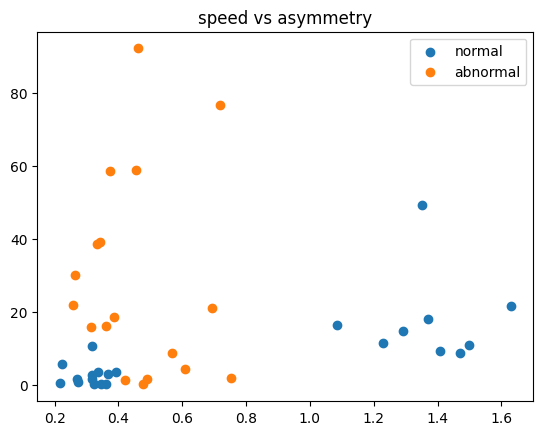

In [260]:
import matplotlib.pyplot as plt
import itertools


legend = list(clustering_df["class"].unique())
print(legend)

unique_numbers = {word: i for i, word in enumerate(set(clustering_df['class']))}

# Map the 'Fruit' column to unique numbers using the dictionary
clustering_df['numClass'] = clustering_df['class'].map(unique_numbers)

for item in itertools.combinations(["avg_step_length", "speed", "asymmetry"], r=2):
    fig, ax = plt.subplots()

    for class_label in legend:
        print(class_label)
        ax.scatter(clustering_df[clustering_df["class"] == class_label][item[0]], clustering_df[clustering_df["class"] == class_label][item[1]], label="class_label")

    ax.legend(legend)
    plt.title(item[0] + " vs " + item[1])
    plt.show()

In [261]:
biometrics_df.head()

,walking_type,video_id,person_id,camera_type,steps_length,avg_step_length,speed,time,distance,asymmetry
0,normal,athletic_male,1,front,"[0.206535, 0.16247936, 0.15428336, 0.16719694,...",0.157053,0.336541,84,0.942315,3.557927
1,abnormal,limping_4,1,front,"[0.32993475, 0.25341373, 0.25160984, 0.2540845...",0.260952,0.387126,182,2.348565,18.524260
2,abnormal,limping_4,2,front,"[0.21386674, 0.21163296, 0.20930154, 0.2111826...",0.185687,0.361059,216,2.599625,15.970930
3,abnormal,cane1,1,front,"[0.21219474, 0.12049623, 0.11709654, 0.1938178...",0.172323,0.258485,240,2.067881,21.721027
4,abnormal,cane1,2,front,"[0.15121503, 0.15126347, 0.15025296, 0.1513829...",0.177433,0.342039,249,2.838926,39.067362


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


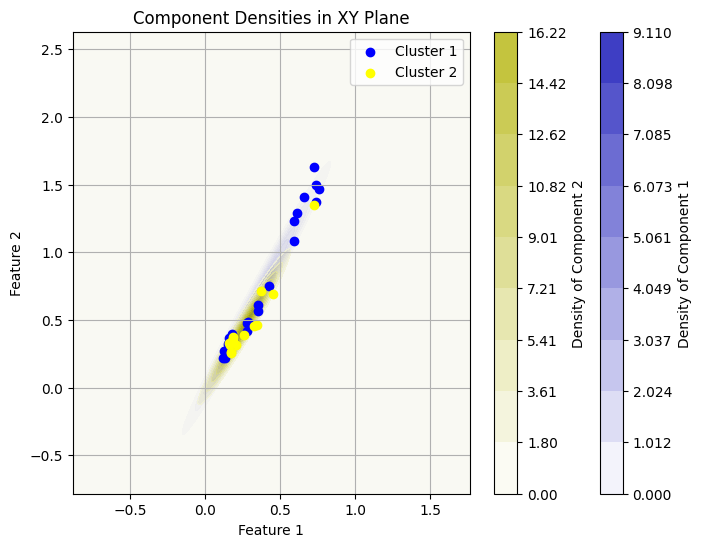

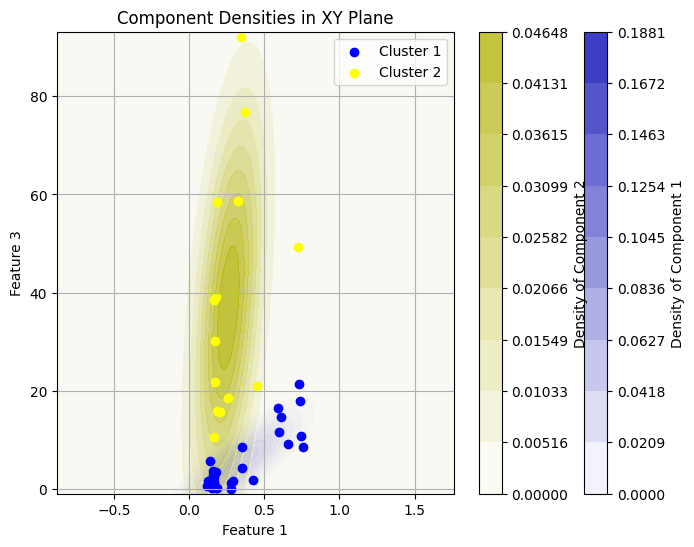

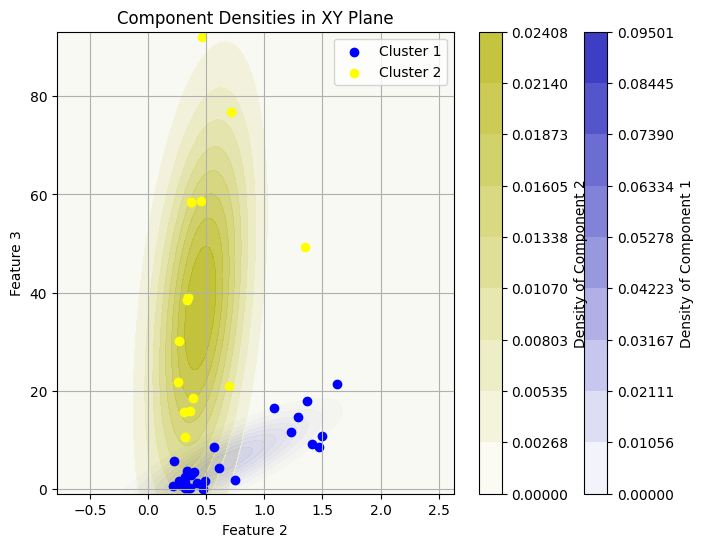

In [263]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import LinearSegmentedColormap, to_rgb, to_hex
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Encode the 'class' column to numerical values
label_encoder = LabelEncoder()
clustering_df['class_encoded'] = label_encoder.fit_transform(clustering_df['class'])

# Train-test split
X = clustering_df[['avg_step_length', 'speed', 'asymmetry']]
y = clustering_df['class_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Fit a Gaussian Mixture Model
n_clusters = len(np.unique(y_train))
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X_train)

# Define base colors for each component
colors = ['#0000FF', '#FFFF00', '#FF0000']  # Adjust these colors as needed

# Create custom colormaps for each component
cmaps = [LinearSegmentedColormap.from_list(f'CustomMap{i}', ['white', color]) for i, color in enumerate(colors)]

# Function to darken a color
def darken_color(color, factor=0.7):
    # Convert the color to RGB
    rgb = to_rgb(color)
    # Darken the RGB values
    dark_rgb = [x * factor for x in rgb]
    # Return the darker color
    return to_hex(dark_rgb)

# Darken each base color
darker_colors = [darken_color(color) for color in colors]

# Create custom colormaps with the darker colors
darker_cmaps = [LinearSegmentedColormap.from_list(f'DarkerCustomMap{i}', ['white', color]) for i, color in enumerate(darker_colors)]

# Now, darker_cmaps contains the darker versions of your original colormaps


# Now, darker_cmaps contains the darker versions of your original colormaps


# Visualization function
def plot_2d_component_densities(X, features, gmm, title):
    x_min, x_max = X[:, features[0]].min() - 1, X[:, features[0]].max() + 1
    y_min, y_max = X[:, features[1]].min() - 1, X[:, features[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_full = np.zeros((grid_points.shape[0], X.shape[1]))
    grid_points_full[:, features] = grid_points

    plt.figure(figsize=(8, 6))

    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        covar_2d = covar[np.ix_(features, features)]
        mean_2d = mean[features]
        z = multivariate_normal(mean_2d, covar_2d).pdf(np.c_[xx.ravel(), yy.ravel()])
        z = z.reshape(xx.shape)
        plt.contourf(xx, yy, z, levels=np.linspace(z.min(), z.max(), 10), cmap=darker_cmaps[i], alpha=0.8)
        plt.colorbar(label=f"Density of Component {i+1}")

    # Predict the cluster for each data point
    cluster_labels = gmm.predict(X)

    # Scatter plot of the original data points, colored by cluster
    for i in range(gmm.n_components):
        plt.scatter(X[cluster_labels == i, features[0]], X[cluster_labels == i, features[1]], 
                    color=colors[i], label=f'Cluster {i+1}')

    plt.title(title)
    plt.xlabel(f'Feature {features[0] + 1}')
    plt.ylabel(f'Feature {features[1] + 1}')
    plt.legend()
    plt.grid(True)

# Call the function with the appropriate parameters
# Example: plot_2d_component_densities(X_train.to_numpy(), [0, 1], gmm, 'Component Densities in XY Plane')
# plt.show()

# Example: Visualize the first two features
plot_2d_component_densities(X.to_numpy(), [0, 1], gmm, 'Component Densities in XY Plane')
plot_2d_component_densities(X.to_numpy(), [0, 2], gmm, 'Component Densities in XY Plane')
plot_2d_component_densities(X.to_numpy(), [1, 2], gmm, 'Component Densities in XY Plane')

plt.show()

